## Example from Rakovszky et al. PRB 105, 075131 (2022).
Figure 2b, L = 21.

In [1]:
import sys
sys.path.append('../')
from spd.OperatorSequence import *
from spd.SparsePauliDynamics import *
from qiskit.quantum_info import *
import matplotlib.pyplot as plt

In [2]:
gx = 1.4
gz = 0.9045
nsites = 21
hx = SparsePauliOp.from_sparse_list([('X', [i], gx) for i in range(nsites)], num_qubits=nsites)
hz = SparsePauliOp.from_sparse_list([('Z', [i], gz) for i in range(nsites)], num_qubits=nsites)
hzz = SparsePauliOp.from_sparse_list([('ZZ', [i, i+1], 1.0) for i in range(nsites-1)], num_qubits=nsites)
hi = [hx[0] + hz[0] + hzz[0]/2] + [hx[i] + hz[i] + hzz[i-1] / 2 + hzz[i] / 2 for i in range(1, nsites-1)] + [hx[nsites-1] + hz[nsites-1] + hzz[nsites-2]/2]

def exp_val_func(obs):
    return [obs.overlap(PauliRepresentation.from_sparse_pauli_op(h)) for h in hi]

In [3]:
dt = 0.05
nsteps = 400
threshold = 0.0002
ops = dt*(hz + hzz + hx)
obs = hi[(nsites-1)//2]
sim = Simulation.from_pauli_list(obs, ops, threshold=threshold, nprocs=4)
r = sim.run_dynamics(nsteps, process=exp_val_func, process_every = 10)
r = np.array(r)
r = r / r[0].sum()

In [4]:
def msd(a):
    j = np.arange(1,len(a)+1)
    return np.sum(a*j**2) - np.sum(a*j)**2
d2 = [msd(ri) for ri in r]
print(d2)

[(0.13486028085041823-3.840264267419596e-19j), (1.0407586686888664+6.505239561989851e-15j), (1.5774892929198643+1.7362665377486346e-14j), (2.3133901229919474+2.7485059618859718e-14j), (3.2772289738303897+3.53774422461198e-14j), (4.271999201287599+4.2347223410942e-14j), (5.334555194846757+4.880894364365796e-14j), (6.446800579094955+5.459401922712845e-14j), (7.61706067403135+5.974975074605429e-14j), (8.817457226859574+6.411904806370779e-14j), (10.013653791793871+6.81892247793636e-14j), (11.271213922017381+7.174462732765022e-14j), (12.552222576449466+7.485905979520488e-14j), (13.780814323207693+7.748196357775269e-14j), (15.078382994536568+7.982372572403985e-14j), (16.363245423187948+8.18978609520117e-14j), (17.646846011167824+8.379096077575013e-14j), (18.94030230445604+8.514020846221051e-14j), (20.186899814947537+8.681340064207548e-14j), (21.365183333557667+8.83614357367077e-14j), (22.557459590547907+8.959962458792555e-14j), (23.64752203584257+9.104786460281649e-14j), (24.607015641865658+

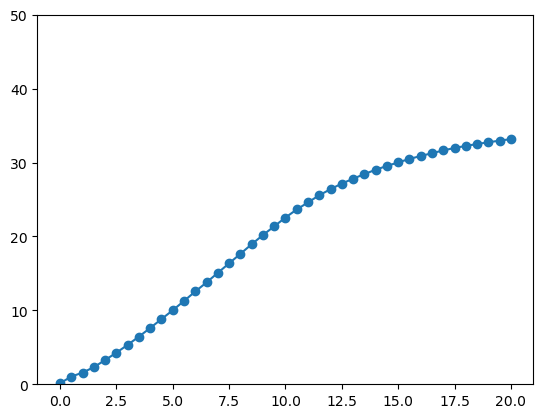

In [5]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(d2))/2, abs(np.array(d2)), '-o')
plt.ylim(0, 50)
plt.show()